In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
df=pd.read_csv("Real_Combine.csv")

In [7]:
df.dropna(inplace=True)

In [46]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


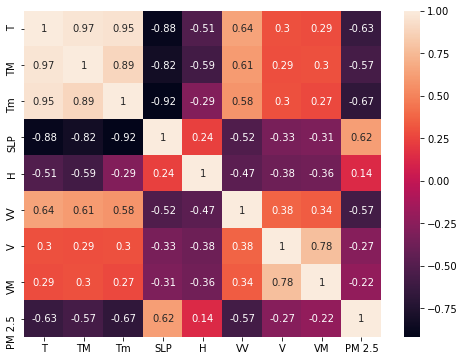

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [22]:
X=df.drop('PM 2.5',axis='columns')
Y=df['PM 2.5']

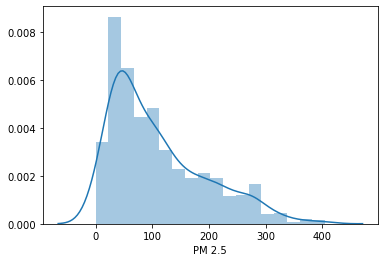

In [54]:
sns.distplot(Y)

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()

In [49]:
feature_selection.fit(X,Y)

ExtraTreesRegressor()

In [50]:
feature_selection.feature_importances_

array([0.18249715, 0.09381379, 0.21936724, 0.13651396, 0.08700076,
       0.18431819, 0.0537731 , 0.04271581])

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
predictions=lr.predict(X_test)

In [65]:
#Intercept and Co-efficient
lr.intercept_,lr.coef_

(195.00171134440228,
 array([ -2.59709897,   0.90169969,  -4.21977418,   0.19418295,
         -1.17099974, -41.88680995,  -2.00097872,   0.69660075]))

In [69]:
pd.DataFrame(lr.coef_,columns=["Coefficients"],index=X.columns)

,Coefficients
T,-2.597099
TM,0.901700
Tm,-4.219774
SLP,0.194183
H,-1.171000
VV,-41.886810
V,-2.000979
VM,0.696601


In [55]:
#R^2 on Train Dataset
lr.score(X_train,y_train)

0.5494718329341765

In [56]:
#R^2 on Test Dataset
lr.score(X_test,y_test)

0.4794720402754764

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test,predictions)

3134.1632795814953

In [57]:
from sklearn.model_selection import cross_val_score

In [62]:
cvs=cross_val_score(lr,X,Y,cv=5)

In [64]:
cvs.mean()

0.4710569304807395

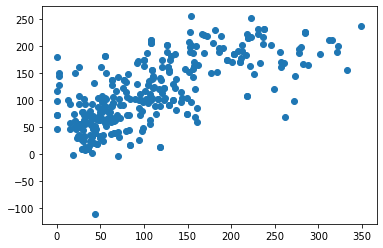

In [72]:
plt.scatter(y_test,predictions)

In [73]:
import pickle

In [76]:
file=open("lr_model.pkl","wb")
pickle.dump(lr,file)